## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, f_oneway, shapiro

In [2]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")



pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [3]:
pokemon['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [4]:
pokemon['Class 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [5]:
pokemon.shape

(800, 11)

In [6]:
# pokemon[pokemon['Class 1'] == 'Grass']
grass_pokemon = pokemon[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')]
rock_pokemon = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
print(grass_pokemon.shape)
print(rock_pokemon.shape)

(95, 11)
(58, 11)


In [7]:
# удалю покемонов еслии у него встречается Rock
grass_pokemon = grass_pokemon[grass_pokemon['Class 2'] != 'Rock']
grass_pokemon = grass_pokemon[grass_pokemon['Class 1'] != 'Rock']

# удалю покемонов еслии у него встречается Grass
rock_pokemon = rock_pokemon[rock_pokemon['Class 2'] != 'Grass']
rock_pokemon = rock_pokemon[rock_pokemon['Class 1'] != 'Grass']

print(grass_pokemon.shape)
print(rock_pokemon.shape)


(93, 11)
(56, 11)


In [8]:
# Для травяных покемонов
print("Grass покемоны:")
print("Среднее значение атаки:", grass_pokemon['Attack'].mean())
print("Медиана атаки:", grass_pokemon['Attack'].median())

# Для каменных покемонов
print("\nRock покемоны:")
print("Среднее значение атаки:", rock_pokemon['Attack'].mean())
print("Медиана атаки:", rock_pokemon['Attack'].median())

Grass покемоны:
Среднее значение атаки: 73.73118279569893
Медиана атаки: 70.0

Rock покемоны:
Среднее значение атаки: 91.78571428571429
Медиана атаки: 92.5


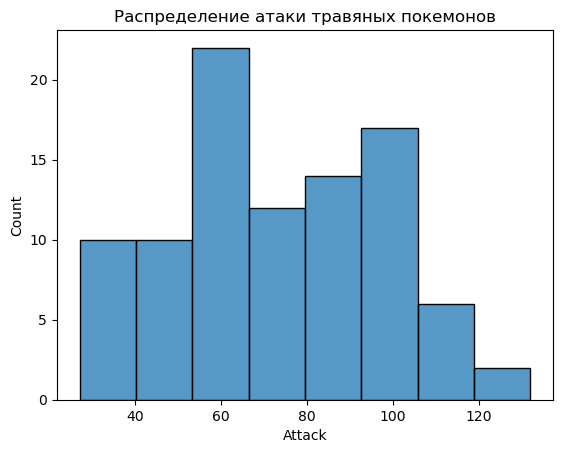

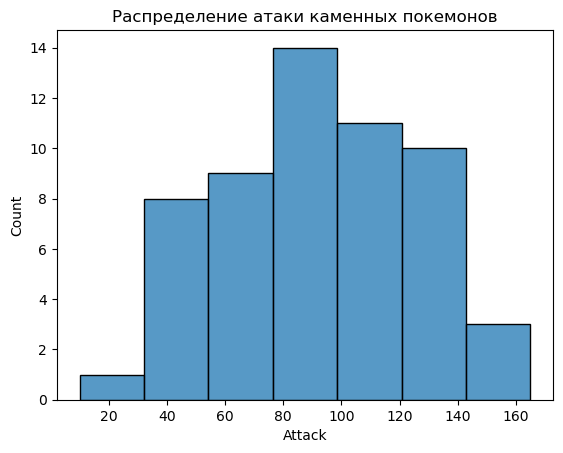

In [9]:
# Проверяем нормальность (хотя если я правильно понял, то это не нужно, так как в задании сказано что распределение нормальное)


# Для травяных покемонов
sns.histplot(grass_pokemon['Attack'])
plt.title('Распределение атаки травяных покемонов')
plt.show()

# Для каменных покемонов
sns.histplot(rock_pokemon['Attack'])
plt.title('Распределение атаки каменных покемонов')
plt.show()

In [10]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(grass_pokemon['Attack'], rock_pokemon['Attack'])

print(f"p-value = {p:.5f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу - разницы нет')
else:
    print('Отклоняем нулевую гипотезу - есть статистически значимая разница') 

p-value = 0.00027
Отклоняем нулевую гипотезу - есть статистически значимая разница


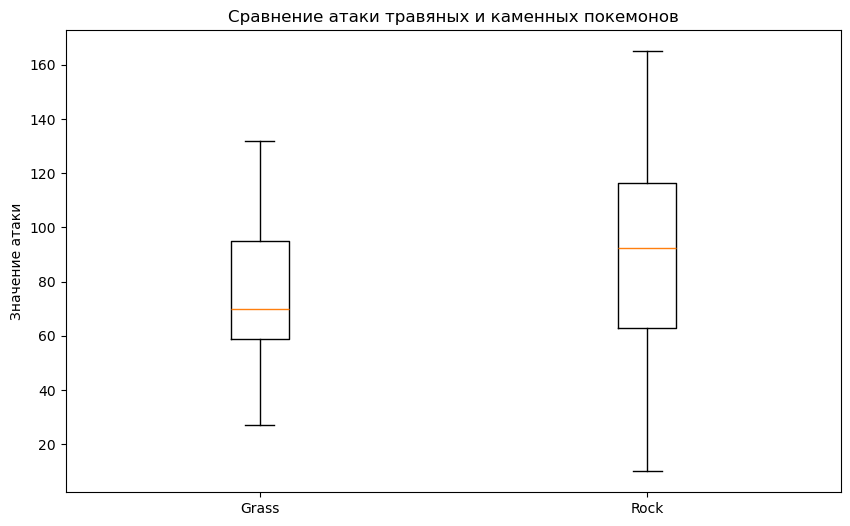

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot([grass_pokemon['Attack'], rock_pokemon['Attack']], 
            labels=['Grass', 'Rock'])

# Добавляем заголовок и подписи осей
plt.title('Сравнение атаки травяных и каменных покемонов')
plt.ylabel('Значение атаки')
plt.show()

#### проффесор Оук не прав в своем предположении, анализ показал что средняя атака травянных покемонов ниже чем у каменных, так же медиана атаки травянных покемонов ниже чем у каменных. И есть статистически значимая разница в атаке между травяными и каменными покемонами, это значит разница не случайная.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [12]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


In [13]:
print(pokemon['Class 1'].isna().sum())
print(pokemon['Class 2'].isna().sum())


0
386


In [14]:
water_pokemon = pokemon[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')]
normal_pokemon = pokemon[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')]
print(water_pokemon.shape)
print(normal_pokemon.shape)
water_pokemon = water_pokemon[water_pokemon['Class 2'] != 'Normal']
water_pokemon = water_pokemon[water_pokemon['Class 1'] != 'Normal']

normal_pokemon = normal_pokemon[normal_pokemon['Class 2'] != 'Water']
normal_pokemon = normal_pokemon[normal_pokemon['Class 1'] != 'Water']

print(water_pokemon.shape)
print(normal_pokemon.shape)


(126, 11)
(102, 11)
(125, 11)
(101, 11)


In [15]:
print("Water покемоны:")
print("Средняя скорость:", water_pokemon['Speed'].mean())
print("Медиана скорости:", water_pokemon['Speed'].median())

print("\nNormal покемоны:")
print("Средняя скорость:", normal_pokemon['Speed'].mean())
print("Медиана скорости:", normal_pokemon['Speed'].median())

Water покемоны:
Средняя скорость: 64.936
Медиана скорости: 65.0

Normal покемоны:
Средняя скорость: 72.25742574257426
Медиана скорости: 72.0



p-value = 0.03255


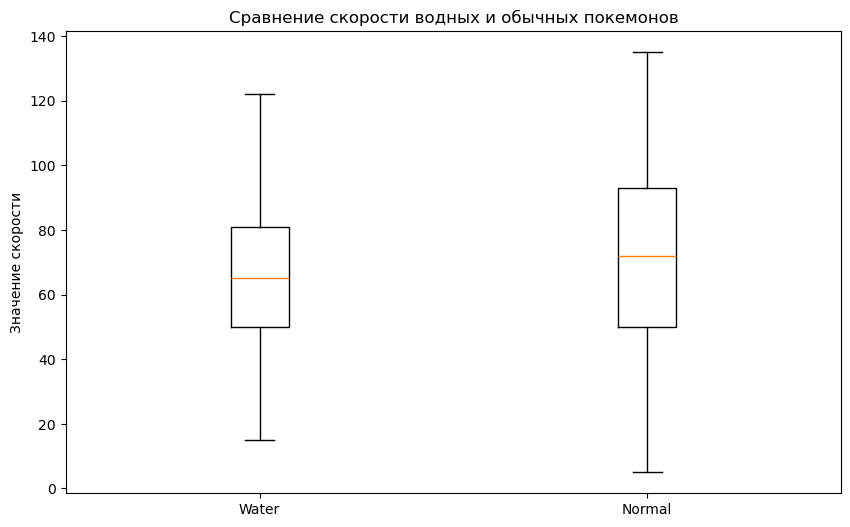

In [16]:
stat, p = ttest_ind(water_pokemon['Speed'], normal_pokemon['Speed'])
print(f"\np-value = {p:.5f}")

plt.figure(figsize=(10, 6))
plt.boxplot([water_pokemon['Speed'], normal_pokemon['Speed']], 
            labels=['Water', 'Normal'])
plt.title('Сравнение скорости водных и обычных покемонов')
plt.ylabel('Значение скорости')
plt.show()

#### Профессор Оук не прав. p-value меньше 0.05, что доказывает статистически значимую разницу в скорости, но в обратную сторону - обычные покемоны оказались быстрее водных

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [17]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


In [18]:
pokemon.Speed.median()

65.0

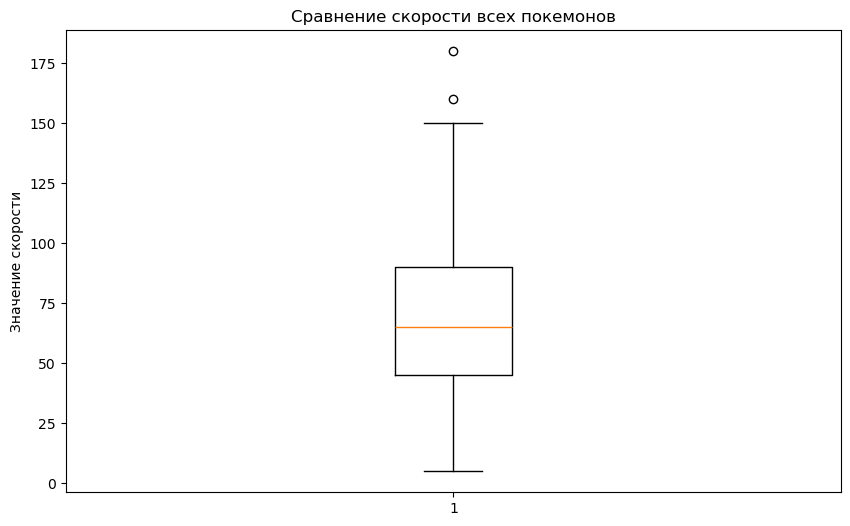

In [19]:
# боксплот для скорости для всех покемонов
plt.figure(figsize=(10, 6))
plt.boxplot(pokemon['Speed'])
plt.title('Сравнение скорости всех покемонов')
plt.ylabel('Значение скорости')
plt.show()


In [20]:
# отсортированный датафрейм по скорости в порядке убывания
pokemon_sorted = pokemon.sort_values(by='Speed', ascending=False)
pokemon_sorted.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
275,276,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,False
678,679,Accelgor,Bug,NaN,80,70,40,100,60,145,False
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True


In [21]:
pokemon[pokemon['Name'] == 'Mega Beedrill']['Speed']


19    145
Name: Speed, dtype: int64

In [22]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [23]:
speed_mean = pokemon['Speed'].mean()
speed_median = pokemon['Speed'].median()


treathed_pokemon_speed = []
for pokemon_name in treathed_pokemon:

    current_speed = pokemon[pokemon['Name'] == pokemon_name]['Speed'].values[0]
    treathed_pokemon_speed.append(current_speed)
    print(f'{pokemon_name} - скорость: {current_speed}')

print("*******************")
print('средняя и медиана скорости всех покемонов')
print(speed_mean)
print(speed_median)

Mega Beedrill - скорость: 145
Mega Alakazam - скорость: 150
Deoxys Normal Forme - скорость: 150
Mega Lopunny - скорость: 135
*******************
средняя и медиана скорости всех покемонов
68.2775
65.0


In [24]:
# покемоны которые не принимали сыворотку
print(pokemon[~pokemon['Name'].isin(treathed_pokemon)]['Speed'].mean())
print(pokemon[~pokemon['Name'].isin(treathed_pokemon)]['Speed'].median())

control_speeds = pokemon[~pokemon['Name'].isin(treathed_pokemon)]['Speed'].values

stat, p = ttest_ind(treathed_pokemon_speed, control_speeds)
print(f"p-value = {p:.5f}")

67.89195979899498
65.0
p-value = 0.00000


In [25]:
print("Размер группы с сывороткой:", len(treathed_pokemon_speed))
print("Размер контрольной группы:", len(control_speeds))
print("\nСредняя скорость с сывороткой:", np.mean(treathed_pokemon_speed))
print("Средняя скорость без сыворотки:", np.mean(control_speeds))

Размер группы с сывороткой: 4
Размер контрольной группы: 796

Средняя скорость с сывороткой: 145.0
Средняя скорость без сыворотки: 67.89195979899498


#### Сыворотка профессора Оука действительно работает. Покемоны с сывороткой имеют среднюю скорость 145,  в два раза больше средней скорости обычных покемонов (67.9). Эта разница статистически значима (p-value = 0).

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [26]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


что мне надо сделать?
1) разделить покемоны на легендарные и не легендарные
2) сложить характеристики HP, Attack, Defense для каждой группы
3) посчитать произведение характеристик HP, Attack, Defense для каждой группы
4) и потом проверить эти цифры? типа больше или нет?
а что еще?


In [27]:
# тут я делаю на легендарных и не легендарных покемонов
legendary_pokemons = pokemon[pokemon['Legendary'] == True]
non_legendary_pokemons = pokemon[pokemon['Legendary'] == False]

# тут я считаю сумму характеристик HP, Attack, Defense для каждой группы
legendary_pokemons['sum_hp_attack_defense'] = legendary_pokemons['HP'] + legendary_pokemons['Attack'] + legendary_pokemons['Defense']
non_legendary_pokemons['sum_hp_attack_defense'] = non_legendary_pokemons['HP'] + non_legendary_pokemons['Attack'] + non_legendary_pokemons['Defense']

# тут я считаю произведение характеристик HP, Attack, Defense для каждой группы
legendary_pokemons['mult_hp_attack_defense'] = legendary_pokemons['HP'] * legendary_pokemons['Attack'] * legendary_pokemons['Defense']
non_legendary_pokemons['mult_hp_attack_defense'] = non_legendary_pokemons['HP'] * non_legendary_pokemons['Attack'] * non_legendary_pokemons['Defense']




In [28]:
print("легендарные покемоны сумма и произведение характеристик среднее")
print(legendary_pokemons['sum_hp_attack_defense'].mean())
print(legendary_pokemons['mult_hp_attack_defense'].mean())

print("легендарные покемоны сумма и произведение характеристик медиана")
print(legendary_pokemons['sum_hp_attack_defense'].median())
print(legendary_pokemons['mult_hp_attack_defense'].median())

print("не легендарные покемоны сумма и произведение характеристик среднее")
print(non_legendary_pokemons['sum_hp_attack_defense'].mean())
print(non_legendary_pokemons['mult_hp_attack_defense'].mean())

print("не легендарные покемоны сумма и произведение характеристик медиана")
print(non_legendary_pokemons['sum_hp_attack_defense'].median())
print(non_legendary_pokemons['mult_hp_attack_defense'].median())


легендарные покемоны сумма и произведение характеристик среднее
309.0769230769231
1085941.6153846155
легендарные покемоны сумма и произведение характеристик медиана
305.0
1000000.0
не легендарные покемоны сумма и произведение характеристик среднее
214.4108843537415
425041.38911564625
не легендарные покемоны сумма и произведение характеристик медиана
213.0
331500.0


In [29]:
# тут я проверяю гипотезу что сумма характеристик легендарных покемонов больше чем у не легендарных
stat, p = ttest_ind(legendary_pokemons['sum_hp_attack_defense'], non_legendary_pokemons['sum_hp_attack_defense'])
print(f"p-value = {p:.5f}")

# тут я проверяю гипотезу что произведение характеристик легендарных покемонов больше чем у не легендарных
stat, p = ttest_ind(legendary_pokemons['mult_hp_attack_defense'], non_legendary_pokemons['mult_hp_attack_defense'])
print(f"p-value = {p:.5f}")


p-value = 0.00000
p-value = 0.00000


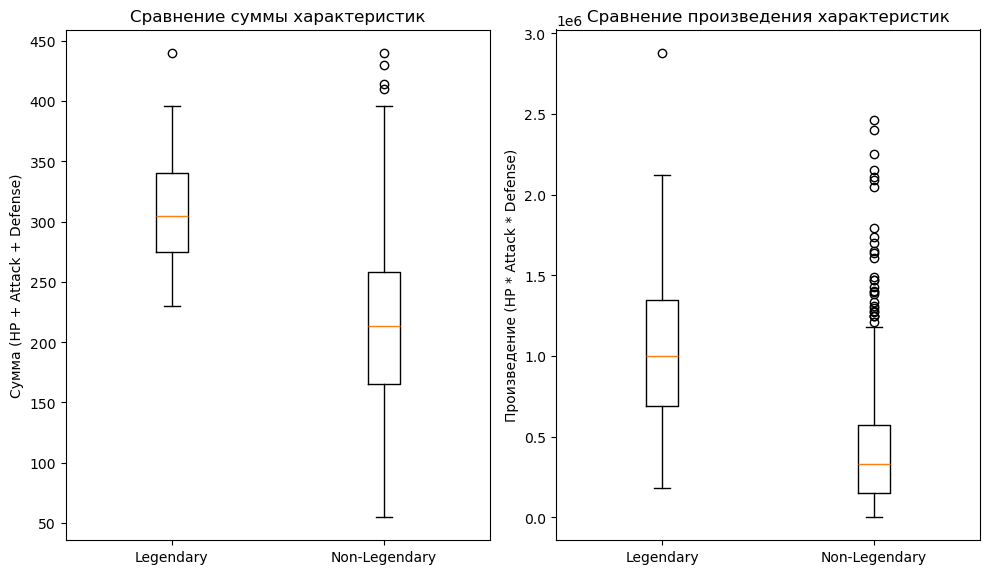

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  
plt.boxplot([legendary_pokemons['sum_hp_attack_defense'], 
            non_legendary_pokemons['sum_hp_attack_defense']], 
            labels=['Legendary', 'Non-Legendary'])
plt.title('Сравнение суммы характеристик')
plt.ylabel('Сумма (HP + Attack + Defense)')

plt.subplot(1, 2, 2)  
plt.boxplot([legendary_pokemons['mult_hp_attack_defense'], 
            non_legendary_pokemons['mult_hp_attack_defense']], 
            labels=['Legendary', 'Non-Legendary'])
plt.title('Сравнение произведения характеристик')
plt.ylabel('Произведение (HP * Attack * Defense)')

plt.tight_layout()
plt.show()


    после анализа видно, что легендарные покемоны действительно превосходят обычных покемонов по характеристикам:По сумме базовых характеристик (HP + Attack + Defense):
    Легендарные покемоны имеют медиану около 300
    Обычные покемоны имеют медиану около 210
    По произведению характеристик (HP × Attack × Defense) разница еще более выраженная
    Эти различия статистически значимы (p-value = 0), значит нет шансов получить такую разницу случайно.
    Визуализация через boxplot тоже показывает превосходство легендарных покемонов по обоим показателям.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [31]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [34]:
rock_pokemon = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
ground_pokemon = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
steel_pokemon = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
ice_pokemon = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

print(rock_pokemon.shape)
print(ground_pokemon.shape)
print(steel_pokemon.shape)
print(ice_pokemon.shape)


(58, 11)
(67, 11)
(49, 11)
(38, 11)


In [36]:
# Очищаем группу Rock
rock_pokemon = rock_pokemon[rock_pokemon['Class 2'] != 'Ground']
rock_pokemon = rock_pokemon[rock_pokemon['Class 2'] != 'Steel']
rock_pokemon = rock_pokemon[rock_pokemon['Class 2'] != 'Ice']
rock_pokemon = rock_pokemon[rock_pokemon['Class 1'] != 'Ground']
rock_pokemon = rock_pokemon[rock_pokemon['Class 1'] != 'Steel']
rock_pokemon = rock_pokemon[rock_pokemon['Class 1'] != 'Ice']

# Очищаем группу Ground
ground_pokemon = ground_pokemon[ground_pokemon['Class 2'] != 'Rock']
ground_pokemon = ground_pokemon[ground_pokemon['Class 2'] != 'Steel']
ground_pokemon = ground_pokemon[ground_pokemon['Class 2'] != 'Ice']
ground_pokemon = ground_pokemon[ground_pokemon['Class 1'] != 'Rock']
ground_pokemon = ground_pokemon[ground_pokemon['Class 1'] != 'Steel']
ground_pokemon = ground_pokemon[ground_pokemon['Class 1'] != 'Ice']

# Очищаем группу Steel
steel_pokemon = steel_pokemon[steel_pokemon['Class 2'] != 'Rock']
steel_pokemon = steel_pokemon[steel_pokemon['Class 2'] != 'Ground']
steel_pokemon = steel_pokemon[steel_pokemon['Class 2'] != 'Ice']
steel_pokemon = steel_pokemon[steel_pokemon['Class 1'] != 'Rock']
steel_pokemon = steel_pokemon[steel_pokemon['Class 1'] != 'Ground']
steel_pokemon = steel_pokemon[steel_pokemon['Class 1'] != 'Ice']

# Очищаем группу Ice
ice_pokemon = ice_pokemon[ice_pokemon['Class 2'] != 'Rock']
ice_pokemon = ice_pokemon[ice_pokemon['Class 2'] != 'Ground']
ice_pokemon = ice_pokemon[ice_pokemon['Class 2'] != 'Steel']
ice_pokemon = ice_pokemon[ice_pokemon['Class 1'] != 'Rock']
ice_pokemon = ice_pokemon[ice_pokemon['Class 1'] != 'Ground']
ice_pokemon = ice_pokemon[ice_pokemon['Class 1'] != 'Steel']

# Проверяем размеры получившихся групп
print("Rock покемоны:", rock_pokemon.shape[0])
print("Ground покемоны:", ground_pokemon.shape[0])
print("Steel покемоны:", steel_pokemon.shape[0])
print("Ice покемоны:", ice_pokemon.shape[0])

Rock покемоны: 41
Ground покемоны: 52
Steel покемоны: 40
Ice покемоны: 33


In [38]:
print('rock pokemon defense mean', rock_pokemon['Defense'].mean())
print('rock pokemon defense median', rock_pokemon['Defense'].median())
print('ground pokemon defense mean', ground_pokemon['Defense'].mean())
print('ground pokemon defense median', ground_pokemon['Defense'].median())
print('steel pokemon defense mean', steel_pokemon['Defense'].mean())
print('steel pokemon defense median', steel_pokemon['Defense'].median())
print('ice pokemon defense mean', ice_pokemon['Defense'].mean())
print('ice pokemon defense median', ice_pokemon['Defense'].median())

rock pokemon defense mean 104.09756097560975
rock pokemon defense median 100.0
ground pokemon defense mean 81.07692307692308
ground pokemon defense median 80.0
steel pokemon defense mean 109.325
steel pokemon defense median 100.0
ice pokemon defense mean 78.51515151515152
ice pokemon defense median 80.0


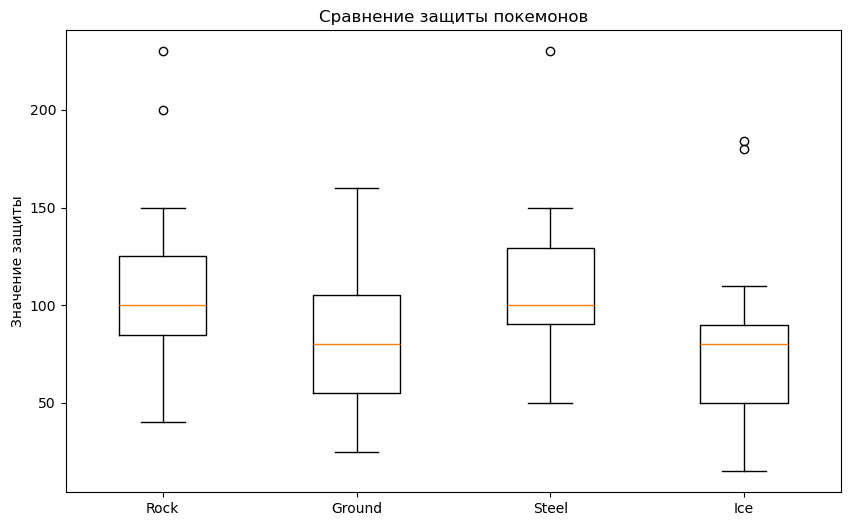

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot([rock_pokemon['Defense'], 
             ground_pokemon['Defense'], 
             steel_pokemon['Defense'], 
             ice_pokemon['Defense']], 
            labels=['Rock', 'Ground', 'Steel', 'Ice'])
plt.title('Сравнение защиты покемонов')
plt.ylabel('Значение защиты')
plt.show()

    судя по боксплоту, они не выглядят одинаковыми, rock и stell похожи, но ground и ice выглядят хуже.
    надо проверить статистически


In [42]:
stat, p = f_oneway(rock_pokemon['Defense'], ground_pokemon['Defense'], steel_pokemon['Defense'], ice_pokemon['Defense'])
print(f"p-value = {p:.5f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу - разницы нет')
else:
    print('Отклоняем нулевую гипотезу - есть статистически значимая разница') 


p-value = 0.00002
Отклоняем нулевую гипотезу - есть статистически значимая разница


    профессор Оук не прав, между классами есть статистически значимая разница

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.